In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import svd
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import Axes3D

In [130]:
# Rotation matrix around Z-axis for finger orientation
def rotation_matrix(orientation_angle):
    return np.array([
        [np.cos(orientation_angle), -np.sin(orientation_angle), 0],
        [np.sin(orientation_angle), np.cos(orientation_angle), 0],
        [0, 0, 1]
    ])

# Apply rotation to finger position
def apply_rotation(finger_position, rotation_angle):
    rot_matrix = rotation_matrix(rotation_angle)
    return np.dot(rot_matrix, finger_position)

# Kinematic equations for a single finger
def kinematics(theta, phi, L1, L2, k):
    x = (L1 * np.cos(theta) + L2 * np.cos(theta + k * theta)) * np.cos(phi)
    y = (L1 * np.cos(theta) + L2 * np.cos(theta + k * theta)) * np.sin(phi)
    z = L1 * np.sin(theta) + L2 * np.sin(theta + k * theta)
    return np.array([x, y, z])

# Jacobian for a single finger
def jacobian(theta, L1, L2, k, phi):
    J_local= np.zeros((3, 1))  # 3D space with 1 finger's contribution
    dx_dtheta = -L1 * np.sin(theta) - L2 * np.sin(theta + k * theta) * (1 + k)
    dy_dtheta = L1 * np.cos(theta) + L2 * np.cos(theta + k * theta) * (1 + k)
    dz_dtheta = L1 * np.cos(theta) + L2 * np.cos(theta + k * theta) * (1 + k)
    J_local[0, 0] = dx_dtheta
    J_local[1, 0] = dy_dtheta
    J_local[2, 0] = dz_dtheta
    
      # Rotation matrix to account for phi
    R_phi = np.array([[np.cos(phi), -np.sin(phi), 0],
                      [np.sin(phi), np.cos(phi), 0],
                      [0, 0, 1]])

    # Apply the rotation matrix to the local Jacobian
    J = np.dot(R_phi, J_local)  # Rotate the local Jacobian by phi
    return J

# Total Jacobian matrix for 3 fingers
def total_jacobian(theta1, theta2, theta3, phi, L1, L2, k):
    J_finger1 = jacobian(theta1, L1, L2, k, phi[0])
    J_finger2 = jacobian(theta2, L1, L2, k,phi[1])
    J_finger3 = jacobian(theta3, L1, L2, k,phi[2])
    J_total = np.hstack([J_finger1, J_finger2, J_finger3])  # Combine them into a single matrix
    return J_total

# Manipulability ellipsoid calculation
def manipulability_ellipsoid(J_total):
    _, singular_values, _ = svd(J_total)
    return singular_values

# Plotting the manipulability ellipsoid for each configuration
def plot_ellipsoid(singular_values):
    u, v = np.mgrid[0:2 * np.pi:100j, 0:np.pi:50j]
    x = singular_values[0] * np.cos(u) * np.sin(v)
    y = singular_values[1] * np.sin(u) * np.sin(v)
    z = singular_values[2] * np.cos(v)
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(x, y, z, color='b', alpha=0.3)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('Manipulability Ellipsoid')
    plt.show()


In [131]:
def force_manipulability_metrics(J):
    JJT = J @ J.T
    if np.linalg.matrix_rank(JJT) == JJT.shape[0]:  # Check full rank
        JJT_inv = np.linalg.inv(JJT)
        U, S, Vt = svd(JJT_inv)
        
        print("force_singular_values:", S)
        print("force_volume: ", np.prod(S))
        print("force_manipulability:", np.sqrt(np.abs(np.linalg.det(JJT_inv))))
        
    return None

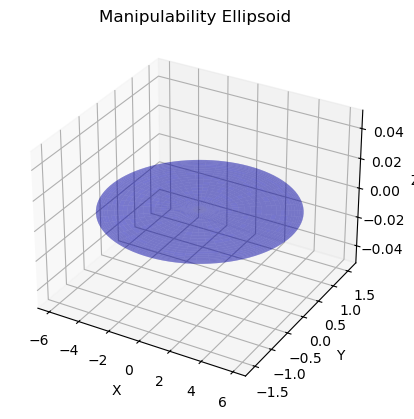

Angles: theta1=0.00, theta2=0.00, theta3=0.00, phi=[0.7853981633974483, 0, 0.7853981633974483]
Velocity Singular values (ellipsoid axes): [5.92300912 1.55498004 0.        ]
Velocity Volume = 0.0; (measures overall dexterity)
Velocity Condition Number  = nan (Uniformity of motion --> lower is better )
Velocity Isotropy  = 0.0 (1 = spherical = ideal)
Yoshikawa's manipulability index 1.3170890159654367e-07


C:\Users\NICOL\AppData\Local\Temp\ipykernel_17756\4041532559.py:42: RuntimeWarning: divide by zero encountered in divide
  print(f"Velocity Condition Number  = {np.max(singular_values / np.min(singular_values))} (Uniformity of motion --> lower is better )")
C:\Users\NICOL\AppData\Local\Temp\ipykernel_17756\4041532559.py:42: RuntimeWarning: invalid value encountered in divide
  print(f"Velocity Condition Number  = {np.max(singular_values / np.min(singular_values))} (Uniformity of motion --> lower is better )")


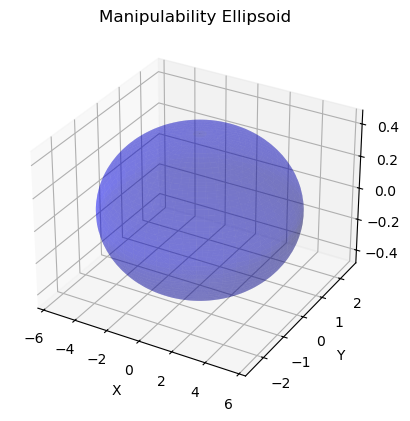

Angles: theta1=0.00, theta2=0.00, theta3=0.00, phi=[0, -0.7853981633974483, 0.7853981633974483]
Velocity Singular values (ellipsoid axes): [5.57082054 2.5        0.46471337]
Velocity Volume = 6.472086912079609; (measures overall dexterity)
Velocity Condition Number  = 11.987648616660653 (Uniformity of motion --> lower is better )
Velocity Isotropy  = 0.08341919520481954 (1 = spherical = ideal)
Yoshikawa's manipulability index 6.47208691207961
force_singular_values: [4.63051902 0.16       0.03222268]
force_volume:  0.023873237502960092
force_manipulability: 0.1545096679918783


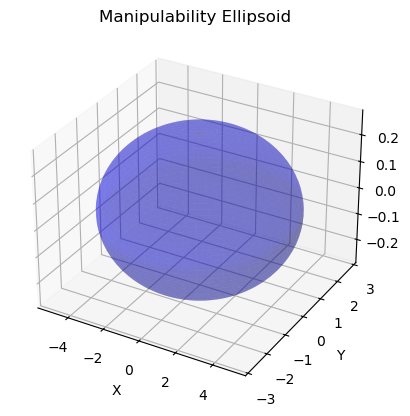

Angles: theta1=0.00, theta2=0.00, theta3=0.79, phi=[0.7853981633974483, 0, 0.7853981633974483]
Velocity Singular values (ellipsoid axes): [5.01330762 2.72970774 0.27996434]
Velocity Volume = 3.8312741018512244; (measures overall dexterity)
Velocity Condition Number  = 17.90695055122898 (Uniformity of motion --> lower is better )
Velocity Isotropy  = 0.05584423752883868 (1 = spherical = ideal)
Yoshikawa's manipulability index 3.831274101851255
force_singular_values: [12.75835145  0.13420469  0.03978793]
force_volume:  0.0681261038326439
force_manipulability: 0.26100977727404157


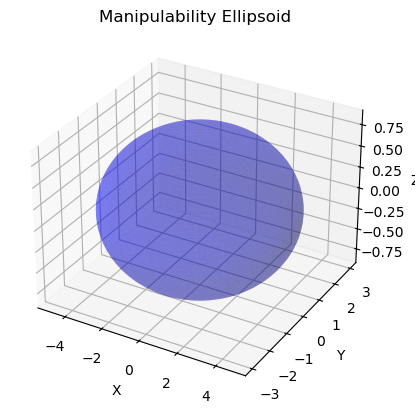

Angles: theta1=0.00, theta2=0.00, theta3=0.79, phi=[0, -0.7853981633974483, 0.7853981633974483]
Velocity Singular values (ellipsoid axes): [4.81369659 2.95105913 0.88459751]
Velocity Volume = 12.566152775889975; (measures overall dexterity)
Velocity Condition Number  = 5.441680038586608 (Uniformity of motion --> lower is better )
Velocity Isotropy  = 0.1837667766037443 (1 = spherical = ideal)
Yoshikawa's manipulability index 12.566152775889982
force_singular_values: [1.27793445 0.11482704 0.04315614]
force_volume:  0.00633279353413292
force_manipulability: 0.07957885104808267


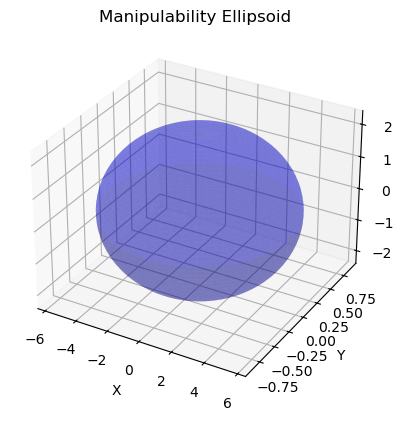

Angles: theta1=0.00, theta2=0.79, theta3=0.00, phi=[0.7853981633974483, 0, 0.7853981633974483]
Velocity Singular values (ellipsoid axes): [5.65041093e+00 8.57784325e-01 2.32135621e-16]
Velocity Volume = 1.1251228042920331e-15; (measures overall dexterity)
Velocity Condition Number  = 2.434099039082013e+16 (Uniformity of motion --> lower is better )
Velocity Isotropy  = 4.108296268738253e-17 (1 = spherical = ideal)
Yoshikawa's manipulability index 1.0872045298685291e-07


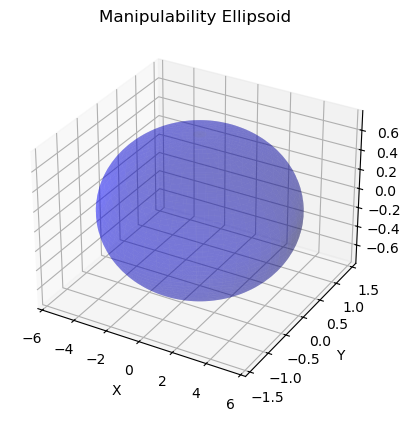

Angles: theta1=0.00, theta2=0.79, theta3=0.00, phi=[0, -0.7853981633974483, 0.7853981633974483]
Velocity Singular values (ellipsoid axes): [5.48475694 1.41187909 0.76614383]
Velocity Volume = 5.932875019826058; (measures overall dexterity)
Velocity Condition Number  = 7.158912923958114 (Uniformity of motion --> lower is better )
Velocity Isotropy  = 0.1396860124745178 (1 = spherical = ideal)
Yoshikawa's manipulability index 5.932875019826055
force_singular_values: [1.70364612 0.50165482 0.03324185]
force_volume:  0.028409893165026092
force_manipulability: 0.16855234547471015


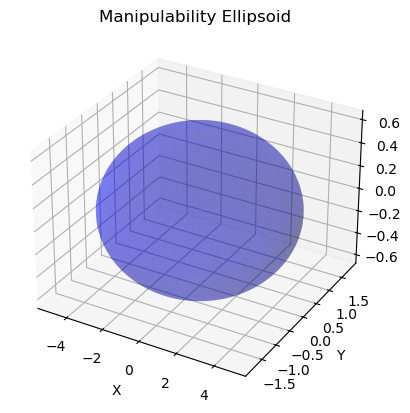

Angles: theta1=0.00, theta2=0.79, theta3=0.79, phi=[0.7853981633974483, 0, 0.7853981633974483]
Velocity Singular values (ellipsoid axes): [4.91295606 1.80686897 0.65112406]
Velocity Volume = 5.780072512109574; (measures overall dexterity)
Velocity Condition Number  = 7.545345536220205 (Uniformity of motion --> lower is better )
Velocity Isotropy  = 0.13253203517316237 (1 = spherical = ideal)
Yoshikawa's manipulability index 5.780072512109573
force_singular_values: [2.35869891 0.30629978 0.04142993]
force_volume:  0.0299318407878496
force_manipulability: 0.17300821017468948


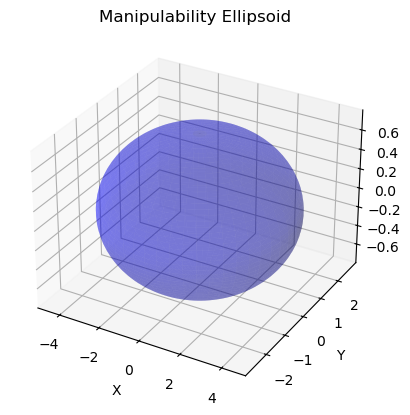

Angles: theta1=0.00, theta2=0.79, theta3=0.79, phi=[0, -0.7853981633974483, 0.7853981633974483]
Velocity Singular values (ellipsoid axes): [4.47539781 2.68393414 0.77018648]
Velocity Volume = 9.25122815395578; (measures overall dexterity)
Velocity Condition Number  = 5.81079766175987 (Uniformity of motion --> lower is better )
Velocity Isotropy  = 0.1720934126791016 (1 = spherical = ideal)
Yoshikawa's manipulability index 9.251228153955786
force_singular_values: [1.68580841 0.13882136 0.04992714]
force_volume:  0.01168426011483668
force_manipulability: 0.10809375613251991


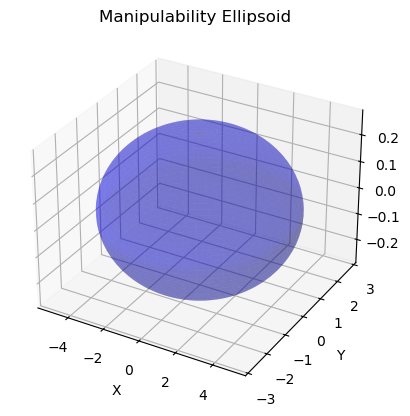

Angles: theta1=0.79, theta2=0.00, theta3=0.00, phi=[0.7853981633974483, 0, 0.7853981633974483]
Velocity Singular values (ellipsoid axes): [5.01330762 2.72970774 0.27996434]
Velocity Volume = 3.8312741018512146; (measures overall dexterity)
Velocity Condition Number  = 17.906950551229034 (Uniformity of motion --> lower is better )
Velocity Isotropy  = 0.05584423752883852 (1 = spherical = ideal)
Yoshikawa's manipulability index 3.831274101851217
force_singular_values: [12.75835145  0.13420469  0.03978793]
force_volume:  0.06812610383264618
force_manipulability: 0.2610097772740445


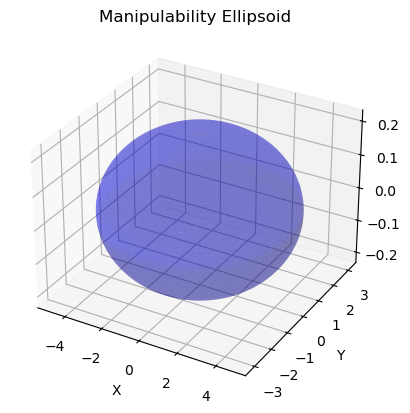

Angles: theta1=0.79, theta2=0.00, theta3=0.00, phi=[0, -0.7853981633974483, 0.7853981633974483]
Velocity Singular values (ellipsoid axes): [4.80459346 3.08687718 0.22362595]
Velocity Volume = 3.3166388780319593; (measures overall dexterity)
Velocity Condition Number  = 21.484955312277478 (Uniformity of motion --> lower is better )
Velocity Isotropy  = 0.04654419734485343 (1 = spherical = ideal)
Yoshikawa's manipulability index 3.316638878031958
force_singular_values: [19.99657504  0.10494489  0.04331983]
force_volume:  0.09090831862413927
force_manipulability: 0.30151006388533563


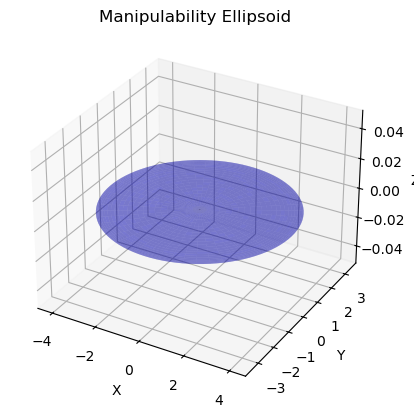

Angles: theta1=0.79, theta2=0.00, theta3=0.79, phi=[0.7853981633974483, 0, 0.7853981633974483]
Velocity Singular values (ellipsoid axes): [4.09690016 3.32284281 0.        ]
Velocity Volume = 0.0; (measures overall dexterity)
Velocity Condition Number  = nan (Uniformity of motion --> lower is better )
Velocity Isotropy  = 0.0 (1 = spherical = ideal)
Yoshikawa's manipulability index 3.5551477950318607e-07


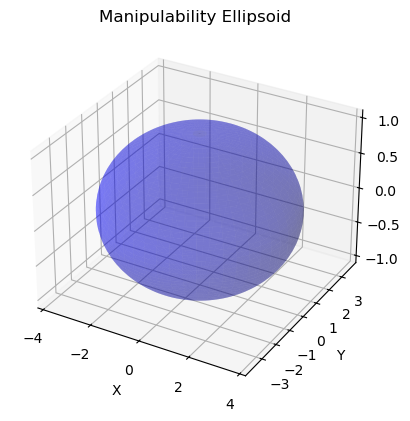

Angles: theta1=0.79, theta2=0.00, theta3=0.79, phi=[0, -0.7853981633974483, 0.7853981633974483]
Velocity Singular values (ellipsoid axes): [3.6916119  3.61502297 1.06277266]
Velocity Volume = 14.18297936753187; (measures overall dexterity)
Velocity Condition Number  = 3.4735668786203635 (Uniformity of motion --> lower is better )
Velocity Isotropy  = 0.28788851199467375 (1 = spherical = ideal)
Yoshikawa's manipulability index 14.182979367531864
force_singular_values: [0.88535869 0.07652051 0.07337835]
force_volume:  0.004971243747583953
force_manipulability: 0.07050704750295499


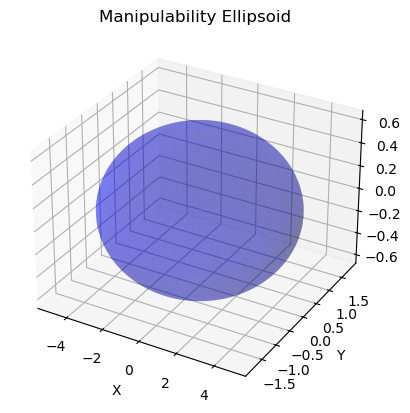

Angles: theta1=0.79, theta2=0.79, theta3=0.00, phi=[0.7853981633974483, 0, 0.7853981633974483]
Velocity Singular values (ellipsoid axes): [4.91295606 1.80686897 0.65112406]
Velocity Volume = 5.780072512109573; (measures overall dexterity)
Velocity Condition Number  = 7.545345536220207 (Uniformity of motion --> lower is better )
Velocity Isotropy  = 0.13253203517316237 (1 = spherical = ideal)
Yoshikawa's manipulability index 5.780072512109577
force_singular_values: [2.35869891 0.30629978 0.04142993]
force_volume:  0.029931840787849735
force_manipulability: 0.17300821017468965


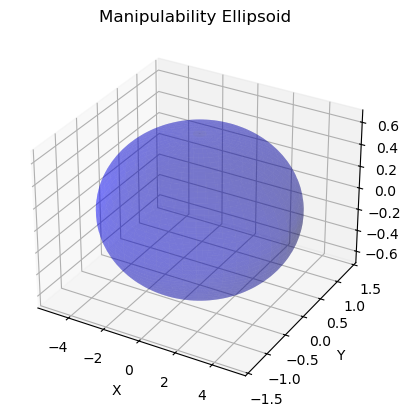

Angles: theta1=0.79, theta2=0.79, theta3=0.00, phi=[0, -0.7853981633974483, 0.7853981633974483]
Velocity Singular values (ellipsoid axes): [5.04922634 1.36613186 0.68181551]
Velocity Volume = 4.703101296279079; (measures overall dexterity)
Velocity Condition Number  = 7.405560998507099 (Uniformity of motion --> lower is better )
Velocity Isotropy  = 0.13503365919227348 (1 = spherical = ideal)
Yoshikawa's manipulability index 4.703101296279083
force_singular_values: [2.15112798 0.53581487 0.03922386]
force_volume:  0.04520966973809863
force_manipulability: 0.2126256563496011


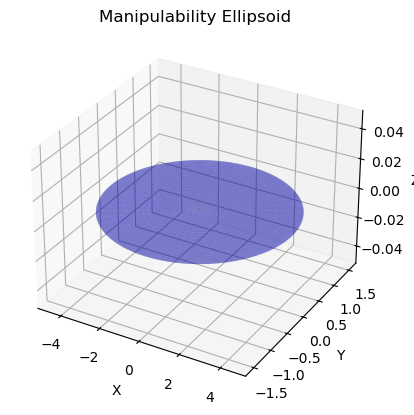

Angles: theta1=0.79, theta2=0.79, theta3=0.79, phi=[0.7853981633974483, 0, 0.7853981633974483]
Velocity Singular values (ellipsoid axes): [4.54697062 1.52114135 0.        ]
Velocity Volume = 0.0; (measures overall dexterity)
Velocity Condition Number  = nan (Uniformity of motion --> lower is better )
Velocity Isotropy  = 0.0 (1 = spherical = ideal)
Yoshikawa's manipulability index 1.5662537297753035e-07


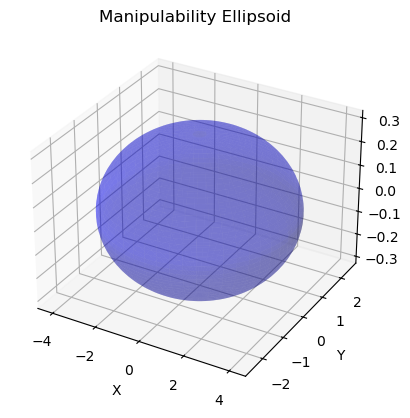

Angles: theta1=0.79, theta2=0.79, theta3=0.79, phi=[0, -0.7853981633974483, 0.7853981633974483]
Velocity Singular values (ellipsoid axes): [4.10690127 2.45390273 0.31707445]
Velocity Volume = 3.19545610912618; (measures overall dexterity)
Velocity Condition Number  = 12.952482434094229 (Uniformity of motion --> lower is better )
Velocity Isotropy  = 0.07720527745073373 (1 = spherical = ideal)
Yoshikawa's manipulability index 3.1954561091261886
force_singular_values: [9.94666517 0.16606775 0.05928864]
force_volume:  0.09793417892365869
force_manipulability: 0.3129443703338647


In [132]:


# Define parameters for the three fingers (these can be adjusted as needed)
L1 = 1.0  # Length of first link for each finger
L2 = 1.0  # Length of second link for each finger
k = 0.5  # Constant for second joint angle modification

# Define the edge cases for the joint angles
theta1_edge_cases = [0,  np.pi / 4]  # Edge angles for finger 1
theta2_edge_cases = [0,  np.pi / 4]  # Edge angles for finger 2
theta3_edge_cases = [0,  np.pi / 4]  # Edge angles for finger 3

phi_finger_1= [0,   np.pi/4]
phi_finger_2 = [0,   -np.pi/4] 
phi_finger_3 = [3 * np.pi/4,  5 *  np.pi/4]

phi_max =  [   np.pi/4, 0, np.pi/4]
phi_min = [0,   -np.pi/4, np.pi/4]
phi_edge_cases = [phi_max, phi_min]         # Edge angles for phi (end-effector orientation)

# Define finger base positions in space (x, y, z) - where the root of each finger is placed
base1 = np.array([1.0, 1.0, 0.5])  # Base position for finger 1
base2 = np.array([2.0, 1.5, 0.5])  # Base position for finger 2
base3 = np.array([1.5, 2.0, 0.5])  # Base position for finger 3


# Loop through the edge cases and compute the manipulability for each configuration
for theta1 in theta1_edge_cases:
    for theta2 in theta2_edge_cases:
        for theta3 in theta3_edge_cases:
            for phi in phi_edge_cases:
                # Compute the total Jacobian for the current configuration
                J_total = total_jacobian(theta1, theta2, theta3, phi, L1, L2, k)
                # Compute the singular values (axes of manipulability ellipsoid)
                singular_values = manipulability_ellipsoid(J_total)
                
                # Plot the manipulability ellipsoid
                plot_ellipsoid(singular_values)

                # Optionally, print or store the results for further analysis
                print(f"Angles: theta1={theta1:.2f}, theta2={theta2:.2f}, theta3={theta3:.2f}, phi={phi}")
                print(f"Velocity Singular values (ellipsoid axes): {singular_values}")
                print(f"Velocity Volume = {np.prod(singular_values)}; (measures overall dexterity)")
                print(f"Velocity Condition Number  = {np.max(singular_values / np.min(singular_values))} (Uniformity of motion --> lower is better )")
                print(f"Velocity Isotropy  = {np.min(singular_values / np.max(singular_values))} (1 = spherical = ideal)")
                
                M = J_total @ J_total.T
              
                manipulability_index = np.sqrt(np.abs(np.linalg.det(M)))
                print(f"Yoshikawa's manipulability index {manipulability_index}")
                
                force_manipulability_metrics(J_total)
                
             
                

In [ ]:
import numpy as np
from scipy.linalg import svd
import matplotlib.pyplot as plt

# Kinematic equations for a single finger
def kinematics(theta, phi, L1, L2, k, base):
    x = (L1 * np.cos(theta) + L2 * np.cos(theta + k * theta)) * np.cos(phi)
    y = (L1 * np.cos(theta) + L2 * np.cos(theta + k * theta)) * np.sin(phi)
    z = L1 * np.sin(theta) + L2 * np.sin(theta + k * theta)
    return base + np.array([x, y, z])

# Jacobian for a single finger (theta actuated, phi fixed per config)
def jacobian(theta, phi, L1, L2, k):
    J_local= np.zeros((3, 1))  # 3D space with 1 finger's contribution
    dx_dtheta = -L1 * np.sin(theta) - L2 * np.sin(theta + k * theta) * (1 + k)
    dy_dtheta = L1 * np.cos(theta) + L2 * np.cos(theta + k * theta) * (1 + k)
    dz_dtheta = L1 * np.cos(theta) + L2 * np.cos(theta + k * theta) * (1 + k)
    J_local[0, 0] = dx_dtheta
    J_local[1, 0] = dy_dtheta
    J_local[2, 0] = dz_dtheta
    
      # Rotation matrix to account for phi
    R_phi = np.array([[np.cos(phi), -np.sin(phi), 0],
                      [np.sin(phi), np.cos(phi), 0],
                      [0, 0, 1]])

    # Apply the rotation matrix to the local Jacobian
    J = np.dot(R_phi, J_local)  # Rotate the local Jacobian by phi
    return J

# Total Jacobian for 3 fingers
def total_jacobian(theta, phi, L1, L2, k):
    
    
    if len(phi) == 3:
        
        J_finger3 = jacobian(theta[2], phi[2], L1, L2, k)
        
        J = np.hstack([J_finger1, J_finger2,J_finger3])
        
    if len(phi) ==2:
        J_finger1 = jacobian(theta[0], phi[0], L1, L2, k)
        J_finger2 = jacobian(theta[1], phi[1], L1, L2, k)
        J = np.hstack([J_finger1, J_finger2])
    return J

# Manipulability and force metrics
def compute_metrics(J):
    U, S, Vt = svd(J)
    M = J @ J.T
    manipulability_index = np.sqrt(np.abs(np.linalg.det(M))) if M.shape[0] == M.shape[1] else 0
    volume = np.prod(S[S > 1e-10])
    condition_number = S.max() / S.min() if S.min() > 1e-10 else np.inf
    isotropy = S.min() / S.max() if S.max() > 1e-10 else 0
    
    force_metrics = {}
   
    #if np.linalg.matrix_rank(M) == M.shape[0]:
    M_inv = np.linalg.pinv(M)
    U_f, S_f, Vt_f = svd(M_inv)
    force_metrics = {
        "force_singular_values": S_f,
        "force_volume": np.prod(S_f),
        "force_manipulability": np.sqrt(np.abs(np.linalg.det(M_inv)))
    }
    
    return {
        "volume": volume,
        "condition_number": condition_number,
        "isotropy": isotropy,
        "manipulability_index": manipulability_index,
        **force_metrics
    }

# Parameters
L1, L2, k = 1.0, 1.0, 0.4
base1, base2, base3 = np.array([1.0, 1.0, 0.5]), np.array([2.0, 1.5, 0.5]), np.array([1.5, 2.0, 0.5])

# Define angle ranges and sample points
theta_range = np.linspace(0, np.pi/4, 50)  # 10 points from 0 to π/4
phi_finger_1 = np.linspace(0, np.pi/4, 10)  # 5 points for finger 1
phi_finger_2 = np.linspace( -np.pi/4, 0, 10)  # 5 points for finger 2
phi_finger_3 = np.linspace(3 * np.pi/4, 5 * np.pi/4, 10)  # 5 points for finger 3

# Store results
results = {
    "theta": [],
    "phi": [],
    "volume": [],
    "condition_number": [],
    "isotropy": [],
    "manipulability_index": [],
    "force_volume": [],
    "force_manipulability": []
}

# Simplify: Vary theta for all fingers together, test a few phi configs
phi_configs = [
    [0, 0, np.pi],  # All fingers aligned
    [np.pi/4, -np.pi/4, np.pi/8],  # Spread configuration
    [0, -np.pi/4, np.pi/4]  # Your original example
]

phi_configs = [
    [0, np.pi/5, np.pi],
    [0, 2*np.pi/3, 4*np.pi/3],# All fingers aligned
    [0, np.pi]
    

]

#phi_configs = []
#for i in range(len(phi_finger_1)):
    #phi_configs.append([phi_finger_1[i], phi_finger_2[0], phi_finger_3[0]])

for phi in phi_configs:
    for theta_val in theta_range:
        theta = [theta_val, theta_val, theta_val]  # All fingers move together
        J = total_jacobian(theta, phi, L1, L2, k)
        metrics = compute_metrics(J)
        
        # Store results
        results["theta"].append(theta_val)
        results["phi"].append(phi)
        results["volume"].append(metrics["volume"])
        results["condition_number"].append(metrics["condition_number"])
        results["isotropy"].append(metrics["isotropy"])
        results["manipulability_index"].append(metrics["manipulability_index"])
        results["force_volume"].append(metrics.get("force_volume", 0))
        results["force_manipulability"].append(metrics.get("force_manipulability", 0))

# Plotting
fig, axes = plt.subplots(3, 2, figsize=(12, 10))
fig.suptitle("Gripper Metrics vs. Theta")

metrics_to_plot = [
    ("volume", "Velocity Volume", "b"),
    ("condition_number", "Velocity Condition Number", "g"),
    ("isotropy", "Velocity Isotropy", "r"),
    ("manipulability_index", "Manipulability Index", "c"),
    ("force_volume", "Force Volume", "m"),
    ("force_manipulability", "Force Manipulability", "y")
]

for i, (metric_key, label, color) in enumerate(metrics_to_plot):
    ax = axes[i // 2, i % 2]
    for j, phi in enumerate(phi_configs):
        idx = [k for k, p in enumerate(results["phi"]) if p == phi]
        theta_vals = np.array(results["theta"])[idx]
        metric_vals = np.array(results[metric_key])[idx]
        ax.plot(theta_vals, metric_vals, label=f"phi={np.round(phi,2)}", color=color, alpha=0.5 + 0.2*j)
       
    ax.set_xlabel("Theta (rad)")
    ax.set_ylabel(label)
    ax.legend(loc="best", prop={'size': 8})
    #ax.legend(loc='upper center', bbox_to_anchor=(1, 0.5))
    ax.grid(True)


plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

IndexError: list index out of range